## Exploratory Data Analysis

In [1]:
#Importing libraries
import time
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt
from io import StringIO

from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

In [9]:
#Importing the dataset
df = pd.read_csv("electric-motor-temperature/pmsm_temperature_data.csv")
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [3]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [4]:
#Describes each column in the dataset
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [5]:
#Checking for missing values
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

([<matplotlib.axis.YTick at 0x7fe272cbfa90>,
 <a list of 7 Text yticklabel objects>)

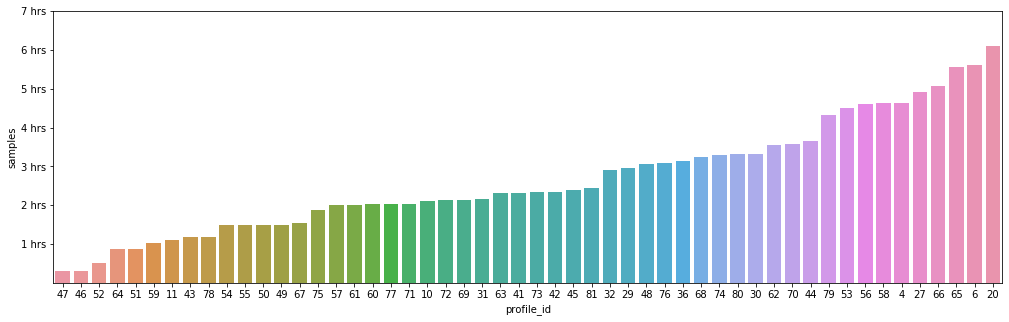

In [6]:
#Duration(number of hours) for each corressponding profile id
import seaborn as sns
fig = plt.figure(figsize=(17, 5))
grpd = df.groupby(['profile_id'])
_df = grpd.size().sort_values().rename('samples').reset_index()
ordered_ids = _df.profile_id.values.tolist()
sns.barplot(y='samples', x='profile_id', data=_df, order=ordered_ids)
tcks = plt.yticks(2*3600*np.arange(1, 8), [f'{a} hrs' for a in range(1, 8)]) # 2Hz sample rate
tcks

In [7]:
#Number of unique profile IDs
df['profile_id'].nunique()

52

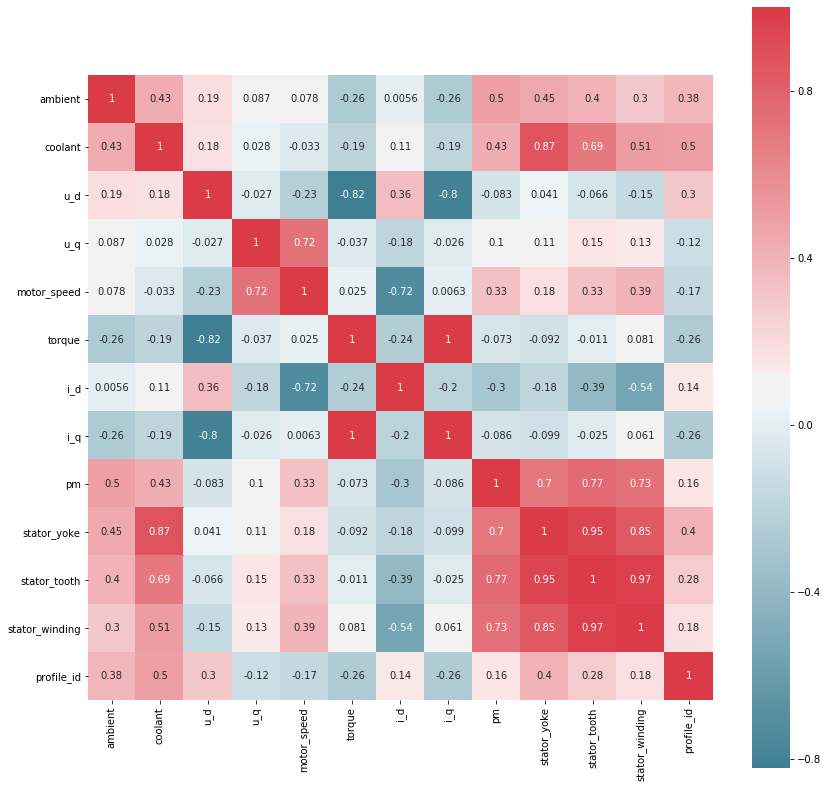

In [8]:
#Corelation between the variables using a heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig = plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),cmap=cmap ,square=True, annot=True)

### Observations from the heatmap:
##### High correlation between i_q and torque
##### High correlation between stator tooth and winding
##### High negative correlation between u_d and torque, i_q 

## Time series gestalt

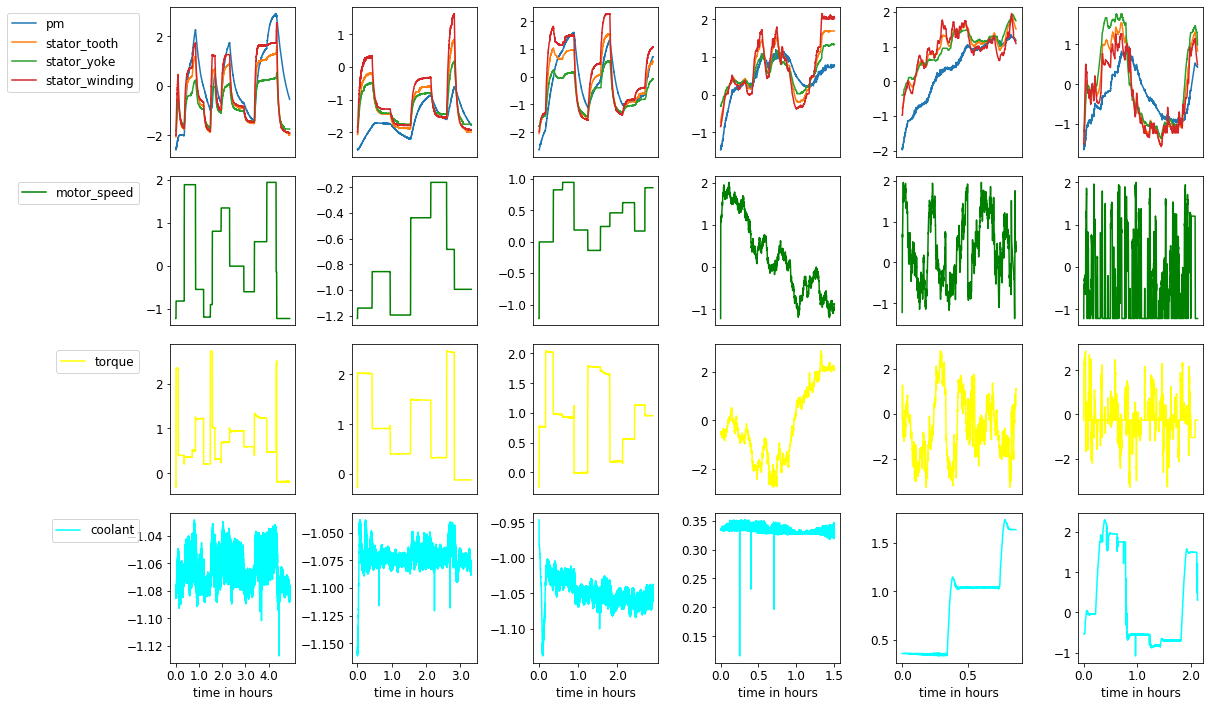

In [9]:
#Time series visualization parameters
target_features = ['pm', 'stator_tooth', 'stator_yoke', 'stator_winding']


def pick_equidistant_elems(m, n):
    """From a set of n elements, pick m which have equal distance to each other"""
    return [i*n//m + n//(2*m) for i in range(m)]

plt.rcParams.update({'font.size': 12})
ids_to_plot = np.asarray(ordered_ids)[pick_equidistant_elems(6, len(ordered_ids))]
fig2 = plt.figure(figsize=(17, 10))
cols = len(ids_to_plot)
for i, (sess_id, _df) in enumerate([g for g in grpd if g[0] in ids_to_plot]):
    _df = _df.reset_index(drop=True)
    plt.subplot(4, cols, i+1)
    plt.xticks([])
    for target in target_features:
        plt.plot(_df[target], label=target)
    if i == 0:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.0))
    plt.subplot(4, cols, i+1+cols)
    plt.plot(_df['motor_speed'], color='green', label='motor_speed')
    plt.xticks([])
    if i == 0:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.0))
    plt.subplot(4, cols, i+1+cols*2)
    plt.plot(_df['torque'], color='yellow', label='torque')
    plt.xticks([])
    if i == 0:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.0))
    plt.subplot(4, cols, i+1+cols*3)
    plt.plot(_df['coolant'], color='cyan', label='coolant')
    k = int(len(_df)> 4*3600) + 1
    plt.xticks(_df['coolant'].index.values[::k*3600], _df.coolant.index.values[::k*3600] / (2*3600))
    plt.xlabel('time in hours')
    if i == 0:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.0))
    
plt.tight_layout()   

# Data pre-processing

In [10]:
#Separating X (independent) and y (dependent variable)
df_1=df
df_1 = df_1.drop('profile_id',1)
X_1 = df_1.drop('torque',1)
Y_1 = df_1[['torque']]
Y_1.head()

,torque
0,-0.250182
1,-0.249133
2,-0.249431
3,-0.248636
4,-0.248701


In [11]:
#Feature Scaling in the range (-1,1)
X_1_scaled = X_1

scaler = MinMaxScaler(feature_range=(-1,1))
X_1_scaled = scaler.fit_transform(X_1_scaled)

X_1_scaled = pd.DataFrame(X_1_scaled)
X_1_scaled.columns = X_1.columns
X_1_scaled.head()

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,0.355474,-0.847536,0.009290,-0.691594,-0.912182,0.985435,-0.010273,-0.960385,-0.998475,-1.000000,-0.999170
1,0.352161,-0.846837,0.010170,-0.691501,-0.912183,0.985405,-0.010264,-0.960510,-0.998264,-0.999415,-0.998998
2,0.350146,-0.846671,0.011751,-0.693763,-0.912182,0.985377,-0.010260,-0.960602,-0.997998,-0.999058,-0.998875
3,0.350485,-0.846711,0.012223,-0.693780,-0.912183,0.986954,-0.010623,-0.960230,-0.997967,-0.998631,-0.998998
4,0.351679,-0.846717,0.012990,-0.694473,-0.912182,0.986473,-0.010513,-0.960324,-0.998044,-0.998476,-0.999218


In [12]:
#Describing each column in scaled X dataset
X_1_scaled.describe()

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,0.485139,-0.296745,-0.155161,0.015482,-0.195926,0.510127,0.067308,-0.053025,-0.143155,-0.060312,-0.137294
std,0.172103,0.491579,0.507812,0.548476,0.589705,0.463914,0.319035,0.358842,0.467360,0.455106,0.427212
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.381946,-0.808049,-0.578121,-0.488874,-0.752841,0.156112,-0.013920,-0.293737,-0.492315,-0.406215,-0.446119
50%,0.531940,-0.385951,-0.021444,-0.036025,-0.274797,0.606669,0.007561,-0.017431,-0.170156,-0.056992,-0.132813
75%,0.604813,0.020041,0.024839,0.485153,0.310550,0.978192,0.227943,0.193878,0.182130,0.292285,0.174916
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


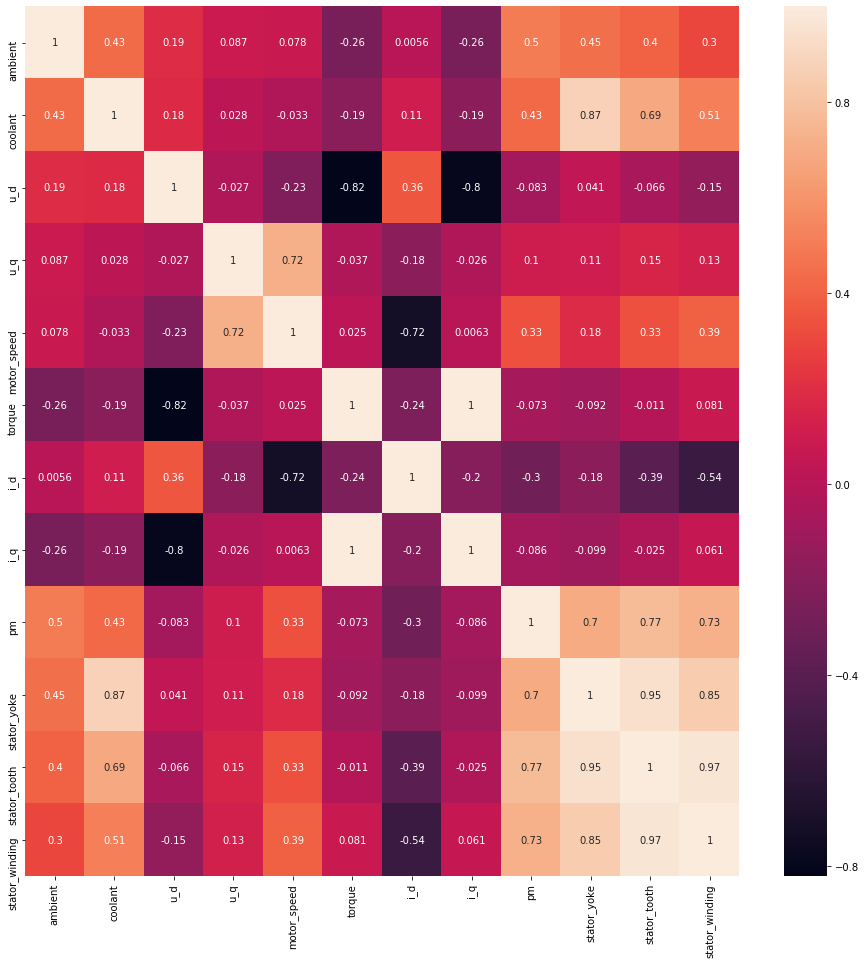

In [13]:
#Experimenting with different Feature Selection methods

#Method 1: Feature scaling using correlation matrix (visualization using heatmap)
corr_matrix = df_1.corr()

%matplotlib inline
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)


In [14]:
#Observing correlation with the target variable
corr_target = abs(corr_matrix["torque"])
corr_target

ambient           0.262264
coolant           0.189617
u_d               0.821325
u_q               0.037262
motor_speed       0.024517
torque            1.000000
i_d               0.239059
i_q               0.996560
pm                0.072905
stator_yoke       0.092207
stator_tooth      0.011055
stator_winding    0.080981
Name: torque, dtype: float64

In [15]:
#Second Method: Feature scaling using Embedded method

reg = LassoCV()
reg.fit(X_1, Y_1)

/home/saloni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saloni/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [16]:
#Observing which columns impact the target variables the most
coef = pd.Series(reg.coef_, index = X_1.columns)
coef

ambient          -0.002523
coolant          -0.000000
u_d              -0.067009
u_q              -0.009337
motor_speed      -0.014333
i_d              -0.033857
i_q               0.933889
pm               -0.003185
stator_yoke      -0.000000
stator_tooth      0.000000
stator_winding    0.004571
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso model')

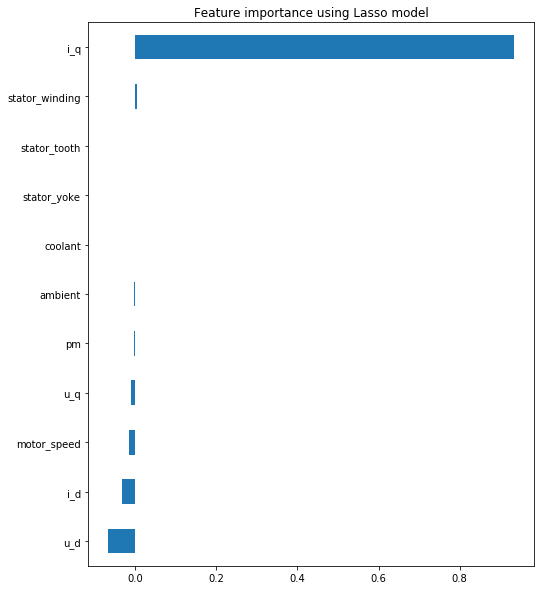

In [17]:
#Drawing a graph of the impact of parameters on the target variable
imp_coef = coef.sort_values()

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso model")

In [19]:
#Extracting relevant features using the second method
relevant_features = coef[coef!=0]
l_1 = relevant_features.keys().tolist()
l_1

['ambient', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q', 'pm', 'stator_winding']

In [20]:
#Removing irrelevant features
X_1_scaled = X_1_scaled[l_1]

In [21]:
#Splitting the data into training and test set

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)

# Non-Neural Models - Individual Implementation

## Linear Regression

In [27]:
lin_reg_error=[]

start_time = time.time()
for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
    #Splitting the data into training and test set
    X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)

    
    #LINEAR REGRESSION
    #Create linear regression object 
    reg = linear_model.LinearRegression()
    
    # train the model using the training set
    warnings.filterwarnings("ignore")
    reg.fit(X_1_train, Y_1_train)
    
    #Prediction
    y_pred = reg.predict(X_1_test)
    
    #Calculation of errors
    lin_reg_mse = metrics.mean_squared_error(Y_1_test, y_pred)
    lin_reg_error.append(lin_reg_mse)

Lin_Reg_Time = (time.time() - start_time)
print(Lin_Reg_Time)
print("--- %s seconds ---" % (Lin_Reg_Time))

/home/saloni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saloni/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


8.37943983078003
--- 8.37943983078003 seconds ---


In [28]:
#Calculating Mean Squared Error(MSE)
Lin_Reg_MSE = np.mean(lin_reg_error)

In [29]:
#Printing MSE
Lin_Reg_MSE

0.0032922888737087854

## Decision Tree

In [30]:
decision_tree_error =[]

start_time = time.time()

for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
    #Splitting the data into training and test set
    X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)
    
    
    #DECISION TREE
    #Creating Decision Tree object
    reg = DecisionTreeRegressor()
    
    #Training the model
    warnings.filterwarnings("ignore")
    reg.fit(X_1_train, Y_1_train)
    
    #Prediction
    y_pred = reg.predict(X_1_test)
    
    #Calculation of errors
    dec_tree_mse = metrics.mean_squared_error(Y_1_test, y_pred)
    decision_tree_error.append(dec_tree_mse)

Dec_Tree_Time = (time.time() - start_time)
print(Dec_Tree_Time)
print("--- %s seconds ---" % (Dec_Tree_Time))

13.862233400344849
--- 13.862233400344849 seconds ---


In [31]:
Dec_Tree_MSE = np.mean(decision_tree_error)
Dec_Tree_MSE

0.00040275321262379406

## SVM Regression - rbf kernel

In [32]:
svm_error = []

start_time = time.time()

for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
    #Splitting the data into training and test set
    X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)
    
    
    #SVM REGRESSION
    #Creating SVR object
    regressor = SVR(kernel='rbf')

    #training the model
    regressor.fit(X_1_train,Y_1_train)

    #Prediction on the test set
    Y_pred = regressor.predict(X_1_test)
    
    #Calculation of errors
    svm_mse = metrics.mean_squared_error(Y_1_test, Y_pred)
    svm_error.append(svm_mse)

SVM_Reg_Time = (time.time() - start_time)
print(SVM_Reg_Time)
print("--- %s seconds ---" % (SVM_Reg_Time))

16.726893186569214
--- 16.726893186569214 seconds ---


In [33]:
SVM_Reg_MSE = np.mean(svm_error)
SVM_Reg_MSE

0.003399255137432592

## SVM Regression - linear kernel

In [34]:
svm_lin_error = []

start_time = time.time()

for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
    #Splitting the data into training and test set
    X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)
    
   
    #SVM REGRESSION
    #Creating SVR object
    regressor = SVR(kernel='linear')

    #training the model
    regressor.fit(X_1_train,Y_1_train)

    #Prediction on the test set
    Y_pred = regressor.predict(X_1_test)
    
    #Calculation of errors
    svm_lin_mse = metrics.mean_squared_error(Y_1_test, Y_pred)
    svm_lin_error.append(svm_lin_mse)

SVM_Reg_lin_Time = (time.time() - start_time)
print(SVM_Reg_lin_Time)
print("--- %s minutes ---" % (SVM_Reg_lin_Time))

106.45449423789978
--- 106.45449423789978 minutes ---


In [35]:
SVM_Lin_Reg_MSE = np.mean(svm_lin_error)
SVM_Lin_Reg_MSE

0.004500582724904433

## SVM Reg - 'poly' kernel

In [36]:
svm_poly_error = []

start_time = time.time()

for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
    #Splitting the data into training and test set
    X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)
    
    #SVM REGRESSION
    #Creating SVR object
    regressor = SVR(kernel='poly')

    #training the model
    regressor.fit(X_1_train,Y_1_train)

    #Prediction on the test set
    Y_pred = regressor.predict(X_1_test)
    
    #Calculation of errors
    svm_poly_mse = metrics.mean_squared_error(Y_1_test, Y_pred)
    svm_poly_error.append(svm_poly_mse)

SVM_Reg_poly_Time = (time.time() - start_time)
print(SVM_Reg_poly_Time)
print("--- %s minutes ---" % (SVM_Reg_poly_Time))

109.37805223464966
--- 109.37805223464966 minutes ---


In [37]:
SVM_Poly_Reg_MSE = np.mean(svm_poly_error)
SVM_Poly_Reg_MSE

0.022940910911643797

# Neural Models - Individual Implementation

## Sequential - baseline model

In [46]:
seq_baseline_error = []

start_time = time.time()

for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
        #Splitting the data into training and test set
            #from sklearn.model_selection import train_test_split
            #X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)
    
    
    #BASELINE MODEL
    def baseline_model():
        model = Sequential()
        model.add(Dense(len(X_1_scaled.columns), input_dim = len(X_1_scaled.columns), kernel_initializer = 'normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
    
    #warnings.filterwarnings("ignore")
    estimator = KerasRegressor(build_fn = baseline_model, epochs=10, batch_size = 100, verbose = 0)
    kfold = KFold(n_splits=10)
    warnings.filterwarnings("ignore")
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
    results = cross_val_score(estimator, X_1_scaled, Y_1, cv=kfold)
    
    #Calculation of errors
    base_mod_mse = results.std()
    seq_baseline_error.append(base_mod_mse)
    
Seq_Base_Time = (time.time() - start_time)
print(Seq_Base_Time)
print("--- %s minutes ---" % (Seq_Base_Time/60))

2574.5315084457397
--- 42.90885847409566 minutes ---


In [47]:
Seq_Baseline_Model_MSE =  np.mean(seq_baseline_error)
Seq_Baseline_Model_MSE

0.0650008791677134

## Sequential - Larger model 

In [48]:
seq_larger_error = []

start_time = time.time()

for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
        #Splitting the data into training and test set
            #from sklearn.model_selection import train_test_split
            #X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)
    
   
    #LARGER MODEL
    def larger_model():
        model = Sequential()
        model.add(Dense(len(X_1_scaled.columns), input_dim = len(X_1_scaled.columns), kernel_initializer = 'normal', activation='relu'))
        model.add(Dense(2, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dense(1, kernel_initializer = 'normal'))
        model.compile(loss = 'mean_squared_error', optimizer = 'adam')
        return model
    
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=10, batch_size = 100, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=10)
    Y_1 = np.asarray(Y_1)
    results = cross_val_score(pipeline, X_1_scaled, Y_1, cv=kfold)
    
    #Calculation of errors
    larger_mod_mse = results.std()
    seq_larger_error.append(larger_mod_mse)

Seq_Larger_Time = (time.time() - start_time)
print(Seq_Larger_Time)
print("--- %s minutes ---" % ((time.time() - start_time)/60))

3572.62291097641
--- 59.54492186307907 minutes ---


In [49]:
Seq_Larger_Model_MSE = np.mean(seq_larger_error)
Seq_Larger_Model_MSE

0.3075916965102384

In [51]:
Seq_Larger_Time

3572.62291097641

## Sequential - Wider model   

In [52]:
seq_wider_error = []

start_time = time.time()

for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
        #Splitting the data into training and test set
            #from sklearn.model_selection import train_test_split
            #X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 12)
    
 
    #LARGER MODEL
    def wider_model():
        model = Sequential()
        model.add(Dense(20, input_dim = len(X_1_scaled.columns), kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dense(1, kernel_initializer = 'normal'))
        model.compile(loss='mean_squared_error', optimizer = 'adam')
        return model
    
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasRegressor(build_fn = wider_model, epochs=10, batch_size = 100, verbose = 0)))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits = 10)
    Y_1 = np.asarray(Y_1)
    results = cross_val_score(pipeline, X_1_scaled, Y_1, cv = kfold)
    
    #Calculation of errors
    wider_mod_mse = results.std()
    seq_wider_error.append(wider_mod_mse)

Seq_Wider_Time = (time.time() - start_time)
print(Seq_Wider_Time)
print("--- %s minutes ---" % ((time.time() - start_time)/60))

3174.2045307159424
--- 52.90424475669861 minutes ---


In [53]:
Seq_Wider_Model_MSE = np.mean(seq_wider_error)
Seq_Wider_Model_MSE

0.010946002542742203

## RNN

In [10]:
#RNN 
import collections
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers
from pandas import DataFrame
from pandas import concat
from tensorflow.keras.layers import LSTM, Dropout, Flatten
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
rnn_error = []
start_time = time.time()

def series_to_supervised(data, n_in = 1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace = True)
    return agg

y = df['torque']
X = df.drop(['torque'], axis = 1)
df = pd.concat([X,y], axis = 1)
values = df.values
reframed = series_to_supervised(values)
reframed.drop(reframed.columns[[13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace = True)
reframed.drop(reframed.columns[[13]], axis=1, inplace = True)
reframed = reframed.rename(columns={"var12(t-1)":"profile_id"})

df = reframed
for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id == profile_id]
    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('var13(t)',1)
    Y_1 = df_1[['var13(t)']]
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
    
    #Feature scaling using Embedded method
    reg = LassoCV()
    reg.fit(X_1, Y_1)
    
    #Observing which columns impact the target variables the most
    coef = pd.Series(reg.coef_, index = X_1.columns)
    
    #Checking the impact of parameters on the target variable
    imp_coef = coef.sort_values()
    relevant_features = coef[coef!=0]
    
    #Extracting relevant features
    l_1 = relevant_features.keys().tolist()
    
    #Removing irrelevant features
    X_1_scaled = X_1_scaled[l_1]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_1_scaled, Y_1, test_size = 0.2, random_state = 42)
    X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    new_model = Sequential()
    new_model.add(LSTM(50, input_shape = (X_train.shape[1],X_train.shape[2]), return_sequences = True))
    new_model.add(Dense(1))
    new_model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=["mean_squared_error"])
    history = new_model.fit(X_train, y_train, epochs=100, batch_size=500, verbose=0, shuffle=False)
    y_pred = new_model.predict(X_test)
    pred = np.array([])
    for i in range(len(y_pred)):
        pred = np.append(pred,y_pred[i][0][0])
    rnn_mse = mean_squared_error(y_test,pred)
    rnn_error.append(rnn_mse)
    #print(len(rnn_error))
    
rnn_time = (time.time() - start_time)
print(rnn_time)
print("--- %s minutes ---" % (rnn_time/60))

1270.1867418289185
--- 21.169779030481973 minutes ---


In [11]:
rnn_avg_mse = sum(rnn_error)/len(rnn_error)
print(rnn_avg_mse)

0.002651591003889104


## CNN

In [54]:
#CNN
from tensorflow.keras.layers import Conv1D, Flatten
cnn_error = []
start_time = time.time()

for profile_id in df['profile_id'].unique():
    df_1 = df[df.profile_id==profile_id]

    df_1 = df_1.drop('profile_id',1)
    X_1 = df_1.drop('torque',1)
    Y_1 = df_1[['torque']]
        
    #Feature Scaling in the range (-1,1)
    X_1_scaled = X_1
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_1_scaled = scaler.fit_transform(X_1_scaled)
    X_1_scaled = pd.DataFrame(X_1_scaled)
    X_1_scaled.columns = X_1.columns
  
    
    cnn_model = Sequential()
    cnn_model.add(Conv1D(32,2, activation="relu", input_shape=(11,1)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64,activation="relu"))
    cnn_model.add(Dense(1))
    cnn_model.compile(loss="mse",optimizer="adam")
    X = X_1_scaled.values.reshape(X_1_scaled.shape[0], X_1_scaled.shape[1], 1)
    xtrain, xtest, ytrain, ytest=train_test_split(X, Y_1, test_size=0.15) 
    ytrain = ytrain.to_numpy()
    ytest= ytest.to_numpy()
    cnn_model.fit(xtrain, ytrain, batch_size=500, epochs=100, verbose=0)
    ypred = cnn_model.predict(xtest)
    pred = np.array([])
    for i in range(len(ypred)):
        pred = np.append(pred,ypred[i][0])
    cnn_mse = mean_squared_error(ytest,pred)
    cnn_error.append(cnn_mse)
    
cnn_time = (time.time() - start_time)
print("--- %s minutes ---" % (cnn_time/60))

--- 21.73635915517807 minutes ---


In [55]:
cnn_avg_mse = sum(cnn_error)/len(cnn_error)
print(cnn_avg_mse)

0.0003722300315566995


In [56]:
Lin_Reg_MSE = np.mean(lin_reg_error)
Dec_Tree_MSE = np.mean(decision_tree_error)
SVM_Reg_MSE = np.mean(svm_error)
SVM_Lin_Reg_MSE = np.mean(svm_lin_error)
SVM_Poly_Reg_MSE = np.mean(svm_poly_error)

In [57]:
print(Lin_Reg_MSE)
print(Dec_Tree_MSE) 
print(SVM_Reg_MSE)
print(SVM_Lin_Reg_MSE)
print(SVM_Poly_Reg_MSE)

0.0032922888737087854
0.00040275321262379406
0.003399255137432592
0.004500582724904433
0.022940910911643797


## GRAPHS - Error and Execution Time Comparison 

In [17]:
Error = [['Linear_Regression',Lin_Reg_MSE], ['Decision_Tree', Dec_Tree_MSE], ['SVM_Regression',SVM_Reg_MSE], ['SVM_Regression_Lin',SVM_Lin_Reg_MSE], ['SVM_Regression_Poly',SVM_Poly_Reg_MSE]] 
 
MSE = pd.DataFrame(Error, columns = ['Model', 'Mean Square Error']).set_index('Model')
MSE

,Mean Square Error
Model,
Linear_Regression,0.003292
Decision_Tree,0.000423
SVM_Regression,0.003399
SVM_Regression_Lin,0.004501
SVM_Regression_Poly,0.022941


In [22]:
Time = [['Linear_Regression',Lin_Reg_Time], ['Decision_Tree', Dec_Tree_Time], ['SVM_Regression',SVM_Reg_Time], ['SVM_Regression_Lin',SVM_Reg_lin_Time], ['SVM_Regression_Poly',SVM_Reg_poly_Time]] 
 
Execution_Time = pd.DataFrame(Time, columns = ['Model', 'Execution Time']).set_index('Model')
Execution_Time

,Execution Time
Model,
Linear_Regression,21.217156
Decision_Tree,31.295718
SVM_Regression,35.948315
SVM_Regression_Lin,207.273492
SVM_Regression_Poly,213.432030


In [23]:
Non_Neural = pd.merge(MSE, Execution_Time, how='left', left_index=True, right_index=True)
Non_Neural

,Mean Square Error,Execution Time
Model,,
Linear_Regression,0.003292,21.217156
Decision_Tree,0.000423,31.295718
SVM_Regression,0.003399,35.948315
SVM_Regression_Lin,0.004501,207.273492
SVM_Regression_Poly,0.022941,213.432030


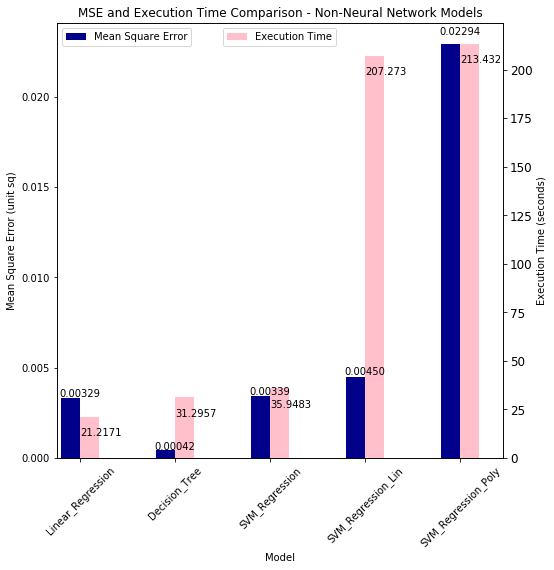

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.2
Non_Neural['Mean Square Error'].plot(kind='bar',use_index=True, color='darkblue', width=width, ax=ax, position=1, rot=45)

Non_Neural['Execution Time'].plot(kind='bar',use_index=True, color='pink', width=width, ax=ax2, position=0)

ax.set_ylabel('Mean Square Error (unit sq)')
ax2.set_ylabel('Execution Time (seconds)')

x=[i for i in range(1,4)]
xlocs, xlabs = plt.xticks()
for i, v in enumerate(Non_Neural['Mean Square Error']):
    plt.text(xlocs[i]-0.22, 9500*v, str(v)[0:7])

x=[i for i in range(1,4)]
xlocs, xlabs = plt.xticks()
for i, v in enumerate(Non_Neural['Execution Time']):
    plt.text(xlocs[i], v-10, str(v)[0:7])

ax.legend(loc='upper left', frameon=True)
ax2.legend(loc='upper center', frameon=True)

plt.title('MSE and Execution Time Comparison - Non-Neural Network Models')

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.rcParams['figure.figsize'] = (9,8)
plt.show()

In [25]:
ANN_Time = [['Sequential Bseline Model',Seq_Base_Time], ['Sequential Model-Larger', Seq_Larger_Time], ['Sequential Model-Wider',Seq_Wider_Time],['RNN Model',RNN_Time], ['CNN Model',CNN_Time]] 
ANN_Execution_Time = pd.DataFrame(ANN_Time, columns = ['ANN Model', 'Execution Time']).set_index('ANN Model')
ANN_Execution_Time['Execution Time (Mins)'] = ANN_Execution_Time['Execution Time']/60
ANN_Execution_Time

,Execution Time,Execution Time (Mins)
ANN Model,,
Sequential Bseline Model,1912.838084,31.880635
Sequential Model-Larger,2347.348774,39.122480
Sequential Model-Wider,2339.084777,38.984746
RNN Model,4854.526433,80.908774
CNN Model,1446.677960,24.111299


In [26]:
ANN_Error = [['Sequential Bseline Model',Seq_Baseline_Model_MSE], ['Sequential Model-Larger', Seq_Larger_Model_MSE], ['Sequential Model-Wider',Seq_Wider_Model_MSE], ['RNN Model', RNN_MSE], ['CNN Model', CNN_MSE]] 
ANN_MSE = pd.DataFrame(ANN_Error, columns = ['Neural Network Model', 'MSE']).set_index('Neural Network Model')
ANN_MSE

,MSE
Neural Network Model,
Sequential Bseline Model,0.064738
Sequential Model-Larger,0.011777
Sequential Model-Wider,0.316616
RNN Model,0.001790
CNN Model,0.000420


In [27]:
ANN = pd.merge(ANN_MSE, ANN_Execution_Time, how='left', left_index=True, right_index=True)
ANN

,MSE,Execution Time,Execution Time (Mins)
Neural Network Model,,,
Sequential Bseline Model,0.064738,1912.838084,31.880635
Sequential Model-Larger,0.011777,2347.348774,39.122480
Sequential Model-Wider,0.316616,2339.084777,38.984746
RNN Model,0.001790,4854.526433,80.908774
CNN Model,0.000420,1446.677960,24.111299


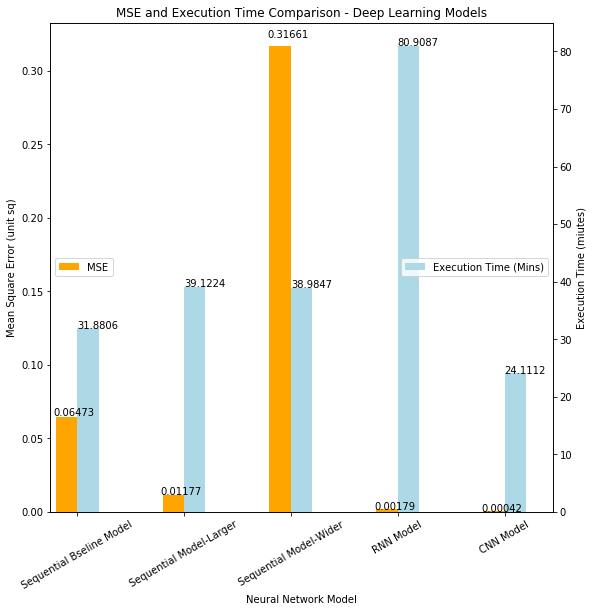

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.2
ANN['MSE'].plot(kind='bar',use_index=True, color='orange', width=width, ax=ax, position=1, rot=30)

ANN['Execution Time (Mins)'].plot(kind='bar',use_index=True, color='lightblue', width=width, ax=ax2, position=0)

ax.set_ylabel('Mean Square Error (unit sq)')
ax2.set_ylabel('Execution Time (miutes)')

ax.legend(loc='center left', frameon=True)
ax2.legend(loc='center right', frameon=True)

plt.title('MSE and Execution Time Comparison - Deep Learning Models')

x=[i for i in range(1,4)]
xlocs, xlabs = plt.xticks()
for i, v in enumerate(ANN['MSE']):
    plt.text(xlocs[i]-0.22, 260*v, str(v)[0:7])

x=[i for i in range(1,4)]
xlocs, xlabs = plt.xticks()
for i, v in enumerate(ANN['Execution Time (Mins)']):
    plt.text(xlocs[i], v, str(v)[0:7])
    
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [29]:
Torque_sensor_RMSE = 0.1375
Torque_sensor_MSE = Torque_sensor_RMSE * Torque_sensor_RMSE
Torque_sensor_MSE

0.018906250000000003

In [32]:
Overall_Comparison = [['Torque_Sensor',Torque_sensor_MSE], ['Linear_Regression',Lin_Reg_MSE],['RNN Model',RNN_MSE], ['Decision_Tree', Dec_Tree_MSE], ['CNN Model',CNN_MSE]]
Overall_Comparison_df = pd.DataFrame(Overall_Comparison, columns = ['Model/Device', 'Mean Squared Error (unit sq)']).set_index('Model/Device')
Overall_Comparison_df

,Mean Squared Error (unit sq)
Model/Device,
Torque_Sensor,0.018906
Linear_Regression,0.003292
RNN Model,0.001790
Decision_Tree,0.000423
CNN Model,0.000420


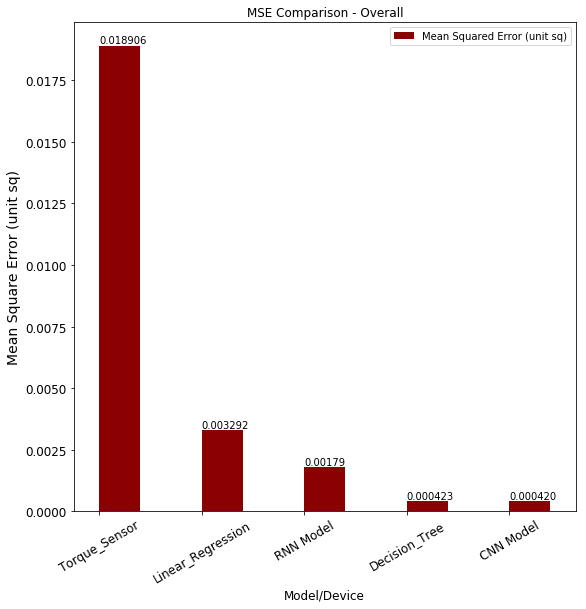

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

width = 0.4
Overall_Comparison_df['Mean Squared Error (unit sq)'].plot(kind='bar',use_index=True, color='darkred', width=width, ax=ax, position=0, rot=30)

ax.set_ylabel('Mean Square Error (unit sq)', fontsize=14)
ax.set_xlabel('Model/Device', fontsize=12)

ax.legend(loc='upper right', frameon=True)
plt.title('MSE Comparison - Overall')

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

x=[i for i in range(1,5)]
xlocs, xlabs = plt.xticks()
for i, v in enumerate(Overall_Comparison_df['Mean Squared Error (unit sq)']):
    plt.text(xlocs[i], v+0.0001, str(v)[0:8])
    
plt.rcParams['figure.figsize'] = (9,9)
plt.show()